# Preamble               


In [1]:
# Packages
import pandas as pd
import seaborn as srn
import statistics as sts
import os
import shutil  

# Checking if the data path exists 
file_path = '.\\BaseFinanceiro\\Financeiro.xlsx'
print(os.path.exists(file_path))

True


# **Checking the data base**


In [2]:
# Importing the entire dataset
dataset = pd.read_excel(file_path, sheet_name=None)

# Checking all sheets
print(dataset.keys())
print(len(dataset.keys()))  # 0-4

dict_keys(['Cliente', 'Fornecedor', 'Banco', 'Pagamentos', 'Recebimentos'])
5


In [3]:
# Defining variables for each sheet
df_cliente = pd.read_excel(file_path, sheet_name=0)
df_fornecedor = pd.read_excel(file_path, sheet_name=1)
df_banco = pd.read_excel(file_path, sheet_name=2)
df_pagamentos = pd.read_excel(file_path, sheet_name=3)
df_recebimentos = pd.read_excel(file_path, sheet_name=4)

## Verifying one variable at a time
#df_cliente
#df_fornecedor
#df_banco
#df_pagamentos
#df_recebimentos

In [4]:
## Summary of dataset information to understand columns, data types, and missing values
print("\nDataset Information:")
df_cliente.info()
#df_banco.info()
#df_fornecedor.info()   
#df_recebimentos.info()
#df_pagamentos.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id Cliente     812 non-null    int64 
 1   Razao Social   812 non-null    object
 2   Nome Fantasia  812 non-null    object
 3   Tipo Pessoa    812 non-null    object
 4   Municipio      812 non-null    object
 5   UF             812 non-null    object
dtypes: int64(1), object(5)
memory usage: 38.2+ KB


In [5]:
# Creating a calendar
start_date = pd.Timestamp('2000-01-01')  # Fixed start date
end_date = pd.Timestamp.today()  # End date as the current date

calendar = pd.DataFrame({
    'Date': pd.date_range(start=start_date, end=end_date, freq='D')  # Daily frequency
})

# Adding columns for Year, Month, Day, and Year_Month
calendar['Year'] = calendar['Date'].dt.year
calendar['Month'] = calendar['Date'].dt.month
calendar['Day'] = calendar['Date'].dt.day
calendar['Year_Month'] = calendar['Date'].dt.to_period('M')

# Displaying the first few rows of the calendar
calendar.head()

# Saving the calendar base to Excel (optional)
# output_path = './Base_Calendario.xlsx'
# calendar.to_excel(output_path, index=False)
# print(f"Calendar base saved at: {output_path}")


,Date,Year,Month,Day,Year_Month
0,2000-01-01,2000,1,1,2000-01
1,2000-01-02,2000,1,2,2000-01
2,2000-01-03,2000,1,3,2000-01
3,2000-01-04,2000,1,4,2000-01
4,2000-01-05,2000,1,5,2000-01


-----------------------------------------
*DATA EXPLORATION AND PROCESSING*
-----------------------------------------

In [6]:
dataset.keys()

dict_keys(['Cliente', 'Fornecedor', 'Banco', 'Pagamentos', 'Recebimentos'])

# **Data Exploration**

## 1. Numerical Data

### 1.1 Recebimentos (Receipts)

In [7]:
# Checking the dataset
df_recebimentos

,Id Cliente,Id Conta Bancária,Data de Emissao,Data de Vencimento,Data da Movimentação,Valor da Movimentação
0,53,x 10859524552-06,2018-01-02,2018-01-02,2018-01-02,675.870
1,178,x 39315597929-00,2018-01-04,2018-01-04,2018-01-04,153538.560
2,178,x 41541621975-04,2018-01-05,2018-01-05,2018-01-05,29823.060
3,178,x 63718177635-06,2018-01-06,2018-01-06,2018-01-06,52492.860
4,178,x 80771218846-00,2018-01-06,2018-01-06,2018-01-06,29336.040
...,...,...,...,...,...,...
1716,180,x 95230728368-03,2019-12-21,2019-12-28,2019-12-28,146192.530
1717,180,x 75664985359-06,2019-12-21,2019-12-28,2019-12-28,133024.720
1718,285,x 32439935907-10,2019-11-30,2019-12-28,2019-12-28,2280.920
1719,286,x 80771218846-00,2019-11-30,2019-12-28,2019-12-28,6015.550


In [8]:
# Checking for null values
df_recebimentos.isnull().sum()

Id Cliente               0
Id Conta Bancária        0
Data de Emissao          0
Data de Vencimento       0
Data da Movimentação     0
Valor da Movimentação    0
dtype: int64

In [9]:
# Copying the DataFrame for formatted display
df_recebimentos_display = df_recebimentos.copy()

# Formatting the values in the copy
df_recebimentos_display['Valor da Movimentação'] = df_recebimentos_display['Valor da Movimentação'].map(
    lambda x: f"R$ {x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')
)

In [10]:
# Converting dates
columns_to_convert = df_recebimentos.columns[2:5]
df_recebimentos[columns_to_convert] = df_recebimentos[columns_to_convert].apply(
    pd.to_datetime, format='%d/%m/%Y', errors='coerce'
)

# Displaying the Receipts table
df_recebimentos_display

,Id Cliente,Id Conta Bancária,Data de Emissao,Data de Vencimento,Data da Movimentação,Valor da Movimentação
0,53,x 10859524552-06,2018-01-02,2018-01-02,2018-01-02,"R$ 675,87"
1,178,x 39315597929-00,2018-01-04,2018-01-04,2018-01-04,"R$ 153.538,56"
2,178,x 41541621975-04,2018-01-05,2018-01-05,2018-01-05,"R$ 29.823,06"
3,178,x 63718177635-06,2018-01-06,2018-01-06,2018-01-06,"R$ 52.492,86"
4,178,x 80771218846-00,2018-01-06,2018-01-06,2018-01-06,"R$ 29.336,04"
...,...,...,...,...,...,...
1716,180,x 95230728368-03,2019-12-21,2019-12-28,2019-12-28,"R$ 146.192,53"
1717,180,x 75664985359-06,2019-12-21,2019-12-28,2019-12-28,"R$ 133.024,72"
1718,285,x 32439935907-10,2019-11-30,2019-12-28,2019-12-28,"R$ 2.280,92"
1719,286,x 80771218846-00,2019-11-30,2019-12-28,2019-12-28,"R$ 6.015,55"


In [11]:
# Grouping by 'Issue Date' (uncomemment the variables to group by other columns)
grouped = df_recebimentos.groupby(['Data de Emissao']).size()
#grouped = df_recebimentos.groupby(['Data da Movimentação']).size()
#grouped = df_recebimentos.groupby(['Data de Vencimento']).size()

grouped

Data de Emissao
2018-01-02     1
2018-01-04     4
2018-01-05     6
2018-01-06    14
2018-01-09     3
              ..
2019-12-15     1
2019-12-17     2
2019-12-19     1
2019-12-21     2
2019-12-28     1
Length: 324, dtype: int64

In [12]:
# Descriptive statistics of numerical features
print('\nDescriptive statistics of numerical features:')
df_recebimentos[['Id Cliente', 'Valor da Movimentação']].describe()


Descriptive statistics of numerical features:


,Id Cliente,Valor da Movimentação
count,1721.000000,1721.000000
mean,324.345729,34499.364443
std,243.399107,51813.348938
min,46.000000,0.000000
25%,165.000000,4879.000000
50%,246.000000,10962.270000
75%,424.000000,25889.230000
max,792.000000,256906.120000


Text(0.5, 1.0, 'Valor da Movimentação')

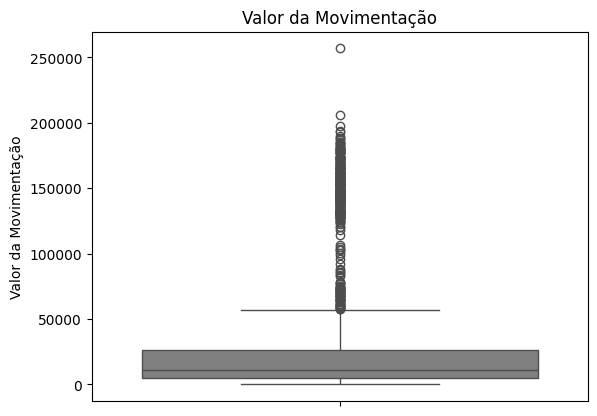

In [13]:
# Boxplot of Transaction Value
srn.boxplot(df_recebimentos['Valor da Movimentação'], color='gray').set_title('Valor da Movimentação')

<Axes: xlabel='Valor da Movimentação', ylabel='Count'>

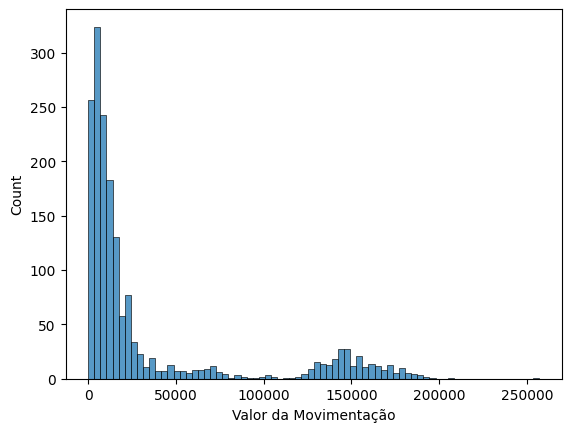

In [14]:
# Histogram of Transaction Value
srn.histplot(df_recebimentos['Valor da Movimentação'])

In [15]:
# Calculating Q1, Q3, and IQR
Q1 = df_recebimentos['Valor da Movimentação'].quantile(0.25) # First quartile 
Q3 = df_recebimentos['Valor da Movimentação'].quantile(0.75) # Third quartile

IQR = Q3 - Q1 # Interquartile range 
print(f'IQR = {IQR}')

# Defining limits for outliers
upper_limit_1 = Q3 + 1.5 * IQR
lower_limit_1 = Q1 - 1.5 * IQR

print(f'limite superior= {upper_limit_1} e limite inferior = {lower_limit_1}.')

IQR = 21010.23
limite superior= 57404.575 e limite inferior = -26636.345.


In [16]:
# Identifying outliers
df_recebimentos['Eh_outlier'] = df_recebimentos['Valor da Movimentação'].apply(
    lambda x: 'Sim' if (x < lower_limit_1 or x > upper_limit_1) else 'Não'
)
df_recebimentos[['Valor da Movimentação', 'Eh_outlier']]

,Valor da Movimentação,Eh_outlier
0,675.870,Não
1,153538.560,Sim
2,29823.060,Não
3,52492.860,Não
4,29336.040,Não
...,...,...
1716,146192.530,Sim
1717,133024.720,Sim
1718,2280.920,Não
1719,6015.550,Não


In [17]:
# Counting outliers
df_recebimentos.groupby(['Eh_outlier']).size()

Eh_outlier
Não    1401
Sim     320
dtype: int64

<Axes: xlabel='Eh_outlier', ylabel='Count'>

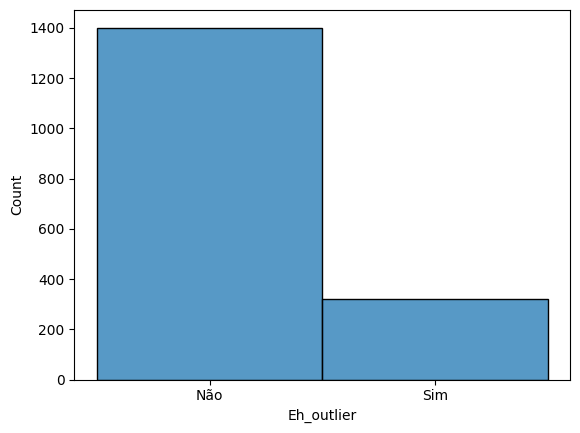

In [18]:
# Histrogram of outliers
srn.histplot(df_recebimentos['Eh_outlier'])

In [19]:
# Filtering data within the interval for processing without outliers
values_without_outliers_1 = df_recebimentos['Valor da Movimentação'][
    (df_recebimentos['Valor da Movimentação'] >= lower_limit_1) |
    (df_recebimentos['Valor da Movimentação'] <= upper_limit_1)
]

In [20]:
# Statistical calculations
mean_1 = sts.mean(df_recebimentos['Valor da Movimentação'])
median_1 = sts.median(df_recebimentos['Valor da Movimentação'])
std_dev_1 = sts.stdev(df_recebimentos['Valor da Movimentação'])
diff_std_median_1 = abs(std_dev_1 - median_1)

# Statistical calculations without outliers
mean_without_outrs_1 = sts.mean(values_without_outliers_1)
median_without_outrs_1 = sts.median(values_without_outliers_1)
std_dev_without_outrs_1 = sts.stdev(values_without_outliers_1)
diff_std_median_without_outrs_1 = abs(std_dev_without_outrs_1 - median_without_outrs_1)

# Displaying results with outliers
print(f'Mean: {mean_1:.2f}')
print(f'Median: {median_1:.2f}')
print(f'Standard Deviation: {std_dev_1:.2f}')
print(f'Absolute difference between standard deviation and median: {diff_std_median_1:.2f}')
print()  # Empty line

# Displaying results without outliers
print(f"Mean without outliers: {mean_without_outrs_1:.2f}")
print(f"Median without outliers: {median_without_outrs_1:.2f}")
print(f"Standard Deviation without outliers: {std_dev_without_outrs_1:.2f}")
print(
    f'Absolute difference between standard deviation and median: '
    f'{diff_std_median_without_outrs_1:.2f}'
)

Mean: 34499.36
Median: 10962.27
Standard Deviation: 51813.35
Absolute difference between standard deviation and median: 40851.08

Mean without outliers: 34499.36
Median without outliers: 10962.27
Standard Deviation without outliers: 51813.35
Absolute difference between standard deviation and median: 40851.08


In [21]:
# Checking if standard deviation is less than IQR
if std_dev_1 < IQR:
    print('It is less')
else:
    print('It is not less')

if std_dev_1 < (1.5 * median_1):
    print('It is less')
else:
    print('It is not less')

# Coefficient of Variation (CV)
coef_variation_1 = std_dev_1 / mean_1
print(f"Coefficient of Variation (CV): {coef_variation_1:.2f}")

if coef_variation_1 > 0.5:
    print("Outliers may be distorting the data.")
else:
    print("The data is consistent.")

print()  # Empty line

if std_dev_without_outrs_1 < IQR:
    print('It is less')
else:
    print('It is not less')

if std_dev_without_outrs_1 < (1.5 * mean_without_outrs_1):
    print('It is less')
else:
    print('It is not less')

# Coefficient of Variation (CV)
coef_variation_2 = std_dev_without_outrs_1 / mean_without_outrs_1
print(f"Coefficient of Variation (CV): {coef_variation_2:.2f}")
if coef_variation_2 > 0.5:
    print("Outliers may be distorting the data.")
else:
    print("The data is consistent.")


It is not less
It is not less
Coefficient of Variation (CV): 1.50
Outliers may be distorting the data.

It is not less
It is not less
Coefficient of Variation (CV): 1.50
Outliers may be distorting the data.


In [22]:
# Identifying outlier clients
outlier_clients_id = df_recebimentos[df_recebimentos['Eh_outlier'] == 'Sim']['Id Cliente'].value_counts()
print(f"Outlier clients:\n{outlier_clients_id}")

Outlier clients:
Id Cliente
178    105
174     94
175     46
105     39
356     18
180     12
176      4
57       1
53       1
Name: count, dtype: int64


In [23]:
# Total received by outlier clients
total_received_clients = df_recebimentos.groupby('Id Cliente')['Valor da Movimentação'].sum()

# Sort values ​​in descending order
total_received_clients = total_received_clients.sort_values(ascending=False)

# Display the first 10 values ​​of the total received by the customer
total_received_clients.head(10)

Id Cliente
178    14118364.42
174    13040682.03
175     8096063.78
105     5538897.66
356     1894207.32
79      1724434.51
133     1703069.44
180     1678335.25
246     1591432.94
96      1464507.48
Name: Valor da Movimentação, dtype: float64

In [24]:
# Frequency percentage of outliers and "liers"
# Total received by outlier customers
freq_outrs_1 = len(df_recebimentos[df_recebimentos['Eh_outlier'] == 'Sim'])

# Calculate the percentage of outliers
percent_outrs_1 = (freq_outrs_1 / len(df_recebimentos)) * 100

# Display the percentage of outliers
print(f"Percentual de Outliers: {percent_outrs_1:.2f}%")
print(f'Percentual de "liers": {(100 - percent_outrs_1):.2f}%')

Percentual de Outliers: 18.59%
Percentual de "liers": 81.41%


In [25]:
# EXPLORING THE CONTRIBUTION OF OUTLIERS TO THE TOTAL RECEIVED
# Total received by outlier customer
otlrs_1 = df_recebimentos[df_recebimentos['Eh_outlier'] == 'Sim'].copy()

# Add columns for Year and Month
otlrs_1['Ano'] = df_recebimentos['Data da Movimentação'].dt.year
otlrs_1['Mês'] = df_recebimentos['Data da Movimentação'].dt.month

# Group and Display total received by year
outliers_by_year = otlrs_1.groupby('Ano')['Valor da Movimentação'].sum()
print(outliers_by_year)
print() # Linha vazia

# Group and Display the total received per month
outliers_by_month = otlrs_1.groupby(['Mês'])['Valor da Movimentação'].sum()
print(f'{outliers_by_month}')

Ano
2018    1.722263e+07
2019    2.632968e+07
Name: Valor da Movimentação, dtype: float64

Mês
1     3891662.679
2     3825333.584
3     2890361.310
4     3510277.840
5     3330004.997
6     2923666.423
7     2610675.784
8     4631809.712
9     3323744.038
10    4149109.430
11    3877556.189
12    4588106.750
Name: Valor da Movimentação, dtype: float64


In [26]:
# Variable for customers who are not outliers (the "liers")
normal_clients = df_recebimentos[df_recebimentos['Eh_outlier'] == 'Não'].copy()

# Add columns for Year and Month
normal_clients['Ano'] = df_recebimentos['Data da Movimentação'].dt.year
normal_clients['Mês'] = df_recebimentos['Data da Movimentação'].dt.month

# Group and Display total received by year
normal_clients_year = normal_clients.groupby('Ano')['Valor da Movimentação'].sum()
print(normal_clients_year)
print() # Empty line

# Group and Display the total received per month
normal_clients_month = normal_clients.groupby('Mês')['Valor da Movimentação'].sum()
print(normal_clients_month) 

Ano
2018    7475576.988
2019    8345520.483
Name: Valor da Movimentação, dtype: float64

Mês
1      998575.263
2     1466430.490
3     1334781.167
4     1257484.984
5     1100712.730
6     1273491.147
7     1365522.077
8     1405765.224
9     1566121.696
10    1392150.191
11    1461397.883
12    1198664.619
Name: Valor da Movimentação, dtype: float64


### 1.2 Pagamentos (Payments)

In [27]:
# Exploring the data frame
df_pagamentos

,Id Fornecedor,Id Conta Bancária,Data de Emissao,Data de Vencimento,Data da Movimentação,Valor da Movimentação
0,9,x 80771218846-00,2018-01-11,2018-01-16,2018-01-11,19540.710
1,150,x 75664985359-06,2018-01-13,2018-01-16,2018-01-18,1577.625
2,150,x 61586581630-06,2018-01-13,2018-01-16,2018-01-19,1431.080
3,150,x 10641176832-10,2018-01-19,2018-01-23,2018-01-19,2060.765
4,197,x 77167377617-02,2018-01-30,2018-01-30,2018-01-30,13182.400
...,...,...,...,...,...,...
999,541,x 86791017985-09,2019-12-18,2019-12-28,2019-12-28,954.250
1000,542,x 61320183682-00,2019-12-18,2019-12-28,2019-12-28,156.960
1001,543,x 94994947160-08,2019-12-28,2019-12-28,2019-12-28,155.320
1002,544,x 32439935907-10,2019-12-18,2019-12-28,2019-12-28,17336.200


In [28]:
# Verifying null values
df_pagamentos.isnull().sum()

Id Fornecedor            0
Id Conta Bancária        0
Data de Emissao          0
Data de Vencimento       0
Data da Movimentação     0
Valor da Movimentação    0
dtype: int64

In [29]:
# Copying the DataFrame for formatted display
df_pagamentos_display = df_pagamentos.copy()
# Formatting the values in the copy
df_pagamentos_display['Valor da Movimentação'] = df_pagamentos_display['Valor da Movimentação'].map(
    lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X','.')
)
df_pagamentos_display

,Id Fornecedor,Id Conta Bancária,Data de Emissao,Data de Vencimento,Data da Movimentação,Valor da Movimentação
0,9,x 80771218846-00,2018-01-11,2018-01-16,2018-01-11,"R$ 19.540,71"
1,150,x 75664985359-06,2018-01-13,2018-01-16,2018-01-18,"R$ 1.577,62"
2,150,x 61586581630-06,2018-01-13,2018-01-16,2018-01-19,"R$ 1.431,08"
3,150,x 10641176832-10,2018-01-19,2018-01-23,2018-01-19,"R$ 2.060,76"
4,197,x 77167377617-02,2018-01-30,2018-01-30,2018-01-30,"R$ 13.182,40"
...,...,...,...,...,...,...
999,541,x 86791017985-09,2019-12-18,2019-12-28,2019-12-28,"R$ 954,25"
1000,542,x 61320183682-00,2019-12-18,2019-12-28,2019-12-28,"R$ 156,96"
1001,543,x 94994947160-08,2019-12-28,2019-12-28,2019-12-28,"R$ 155,32"
1002,544,x 32439935907-10,2019-12-18,2019-12-28,2019-12-28,"R$ 17.336,20"


In [30]:
# Grouping (uncomemment the variables to group by other columns) 
grouped = df_pagamentos.groupby(['Data de Emissao']).size()
#agrupamento = df_pagamentos.groupby(['Data da Movimentação']).size()
#agrupamento = df_pagamentos.groupby(['Data de Vencimento']).size()

grouped

Data de Emissao
2018-01-05    1
2018-01-06    1
2018-01-10    1
2018-01-11    1
2018-01-12    1
             ..
2019-12-19    4
2019-12-20    2
2019-12-26    2
2019-12-27    7
2019-12-28    1
Length: 343, dtype: int64

In [31]:
# Descriptive statistics of numerical features
print('\nDescriptive statistics of numerical features:')
df_pagamentos[['Id Fornecedor', 'Valor da Movimentação']].describe()


Descriptive statistics of numerical features:


,Id Fornecedor,Valor da Movimentação
count,1004.000000,1.004000e+03
mean,408.761952,2.392063e+04
std,180.340196,7.768758e+04
min,4.000000,0.000000e+00
25%,254.000000,2.045190e+03
50%,459.000000,7.068600e+03
75%,570.000000,1.706358e+04
max,630.000000,1.087492e+06


Text(0.5, 1.0, 'Valor da Movimentação')

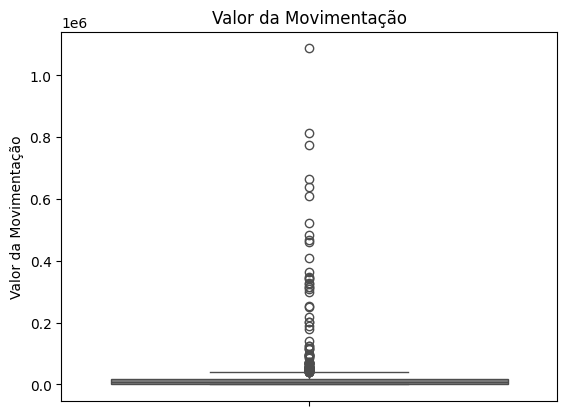

In [32]:
# Boxplot of Transaction Value
srn.boxplot(df_pagamentos['Valor da Movimentação'], color='gray').set_title('Valor da Movimentação')

<Axes: xlabel='Valor da Movimentação', ylabel='Count'>

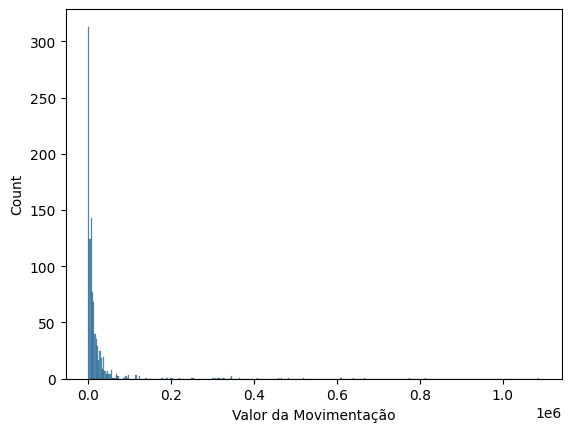

In [33]:
# Histogram of Transaction Value
srn.histplot(df_pagamentos['Valor da Movimentação'])

In [34]:
# Calculating Q1, Q3, and IQR
Q1 = df_pagamentos['Valor da Movimentação'].quantile(0.25) # First quartile
Q3 = df_pagamentos['Valor da Movimentação'].quantile(0.75) # Third quartile

IQR = Q3 - Q1 # Amplitude interquartil
print(f'IQR = {IQR}')

# Calculating limits for outliers
upper_limit_2 = Q3 + 1.5 * IQR 
lower_limit_2 = Q1 - 1.5 * IQR 
print(f'limite superior= {upper_limit_2} e limite inferior = {lower_limit_2}.')

# Defining limits for outliers
df_pagamentos['Valor da Movimentação'][
    (df_pagamentos['Valor da Movimentação'] <= lower_limit_2) |
    (df_pagamentos['Valor da Movimentação'] >= upper_limit_2)
]

IQR = 15018.386249999998
limite superior= 39591.155625 e limite inferior = -20482.389375.


18      42971.460
25      55102.950
36      50196.580
38     124783.400
40      62689.410
          ...    
935    610251.495
947    200492.740
948    202576.360
970     40775.420
993     41110.580
Name: Valor da Movimentação, Length: 87, dtype: float64

In [35]:
# Identifying outliers
df_pagamentos['Eh_outlier'] = df_pagamentos['Valor da Movimentação'].apply(
    lambda x: 'Sim' if (x < lower_limit_2 or x > upper_limit_2) else 'Não'
)
df_pagamentos[['Valor da Movimentação', 'Eh_outlier']]

,Valor da Movimentação,Eh_outlier
0,19540.710,Não
1,1577.625,Não
2,1431.080,Não
3,2060.765,Não
4,13182.400,Não
...,...,...
999,954.250,Não
1000,156.960,Não
1001,155.320,Não
1002,17336.200,Não


In [36]:
# Counting outliers
df_pagamentos.groupby(['Eh_outlier']).size()

Eh_outlier
Não    917
Sim     87
dtype: int64

<Axes: xlabel='Eh_outlier', ylabel='Count'>

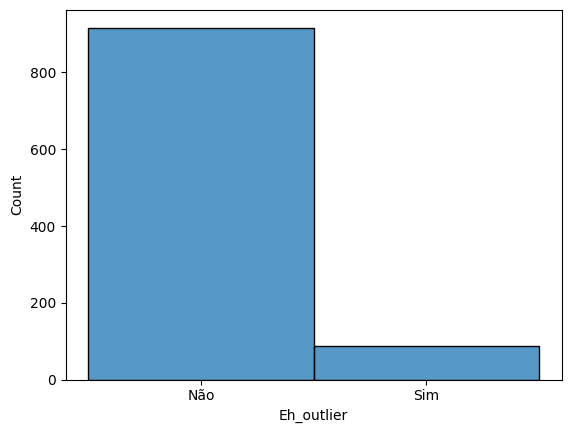

In [37]:
# Histogram of outliers
srn.histplot(df_pagamentos['Eh_outlier'])

In [38]:
# Statistical calculations
mean_2 = sts.mean(df_pagamentos['Valor da Movimentação'])  # Mean
median_2 = sts.median(df_pagamentos['Valor da Movimentação'])  # Median
std_dev_2 = sts.stdev(df_pagamentos['Valor da Movimentação'])  # Standard deviation
dif_desv_median_2 = abs(std_dev_2 - median_2)  # Difference between standard deviation and median

# Displaying results
print(f'Mean: {mean_2: .2f}')
print(f'Median: {median_2: .2f}')
print(f'Standard Deviation: {std_dev_2: .2f}')
print(f'Absolute difference between standard deviation and median: {dif_desv_median_2: .2f}')
print()  # Empty line

# Statistical calculations without outliers
mean_without_otlrs_2 = sts.median(otlrs_1)  # Mean without outliers
median_without_otlrs_2 = sts.mean(otlrs_1)  # Median without outliers
std_dev_without_otlrs_2 = sts.stdev(otlrs_1)  # Standard deviation without outliers
diff_stdmedian_without_otlrs_2 = abs(std_dev_without_otlrs_2 - median_without_otlrs_2)  # Difference between standard deviation and median

# Displaying results without outliers
print(f"Mean without outliers: {mean_without_otlrs_2: .2f}")
print(f'Median without outliers: {median_without_otlrs_2: .2f}')
print(f'Standard deviation without outliers: {std_dev_without_otlrs_2: .2f}')
print(f'Absolute difference between standard deviation and median: {diff_stdmedian_without_otlrs_2: .2f}')

Mean:  23920.63
Median:  7068.60
Standard Deviation:  77687.58
Absolute difference between standard deviation and median:  70618.98



TypeError: can't convert type 'str' to numerator/denominator

In [63]:
# Checking if standard deviation is less than IQR
if std_dev_2 < IQR:
    print('It is less')
else:
    print('It is not less')

# Checking if the standard deviation is less than 1.5 times the median
if std_dev_2 < (1.5 * median_2):
    print('It is less')
else:
    print('It is not less')

# Coefficient of Variation (CV)
coef_variation_3 = std_dev_2 / mean_2 
print(f'Coefficient of Variation (CV): {coef_variation_3:.2f}')

if coef_variation_3 > 0.5:
    print("Outliers may be distorting the data.")
else:
    print("The data is consistent.")

print()  # Empty line

# Without outliers
# Checking if standard deviation is less than IQR
if std_dev_without_otlrs_2 < IQR:
    print('It is less')
else:
    print('It is not less')

# Checking if the standard deviation is less than 1.5 times the median
if std_dev_without_otlrs_2 < (1.5 * mean_without_otlrs_2):
    print('It is less')
else:
    print('It is not less')

# Coefficient of Variation (CV)
coef_variacao_4 = std_dev_without_otlrs_2 / mean_without_otlrs_2 
print(f'Coefficient of Variation (CV): {coef_variacao_4:.2f}')

# Checking if the data is consistent or if there are outliers
if coef_variacao_4 > 0.5:
    print('Outliers may be distorting the data.')
else:
    print('The data is consistent.')

It is not less
It is not less
Coefficient of Variation (CV): 3.25
Outliers may be distorting the data.

It is not less
It is not less
Coefficient of Variation (CV): 2.87
Outliers may be distorting the data.


In [64]:
# Frequency percentage of outliers and "liers"
# Counting and identifying outlier suppliers
freq_otlrs_pagamentos = len(df_pagamentos[df_pagamentos['Eh_outlier'] == 'Sim'])

# Calculate outlier percentage
percent_otlrs_pagamentos = (freq_otlrs_pagamentos / len(df_pagamentos)) * 100

# Display the percentage of outliers
print(f'Percentage of outliers: {percent_otlrs_pagamentos:.2f}%')
print(f'Percentage of "liers": {(100 - percent_otlrs_pagamentos):.2f}%')

Percentage of outliers: 8.67%
Percentage of "liers": 91.33%


In [42]:
# Identifying outlier suppliers
outliers_fornecedor_id = df_pagamentos[df_pagamentos['Eh_outlier'] == 'Sim']['Id Fornecedor'].value_counts().head(10)
print(f'Outlier suppliers:\n{outliers_fornecedor_id}')

Fornecedores outliers:
Id Fornecedor
561    19
587    12
9       7
169     7
136     2
99      2
315     2
78      2
433     2
29      2
Name: count, dtype: int64


In [65]:
# Group by 'Supplier Id' and add the values
total_supplier_expense = df_pagamentos.groupby('Id Fornecedor')['Valor da Movimentação'].sum()

# Sort from highest to lowest
total_supplier_expense = total_supplier_expense.sort_values(ascending=False)
total_supplier_expense.head(10)

Id Fornecedor
561    9593634.090
169    1432376.330
587    1122722.265
590     995805.125
9       863457.105
570     555277.415
575     425922.735
433     410728.640
150     317809.625
29      307463.450
Name: Valor da Movimentação, dtype: float64

In [74]:
# Filter the data without 'liers'
otlrs_2 = df_pagamentos[df_pagamentos['Eh_outlier'] == 'Sim'].copy()

# Add columns for Year and Month
otlrs_2['Ano'] = df_pagamentos['Data da Movimentação'].dt.year 
otlrs_2['Mês'] = df_pagamentos['Data da Movimentação'].dt.month

# Group by Year and sum the values
otlrs_year_pagamentos = otlrs_2.groupby('Ano')['Valor da Movimentação'].sum()
print(otlrs_year_pagamentos)

print() # Empty line

# Group by Month and sum the values
otlrs_month_pagamentos = otlrs_2.groupby('Mês')['Valor da Movimentação'].sum()
print(otlrs_month_pagamentos)

Ano
2018    6202519.015
2019    9372365.800
Name: Valor da Movimentação, dtype: float64

Mês
1      341987.520
2      207845.015
3      698218.465
4      640444.140
5     1304620.065
6      726656.385
7     1640316.720
8     2998651.250
9     2113459.460
10    1336357.995
11    2035950.735
12    1530377.065
Name: Valor da Movimentação, dtype: float64


In [45]:
# Filter the data without 'liers'
normal_clients = df_pagamentos[df_pagamentos['Eh_outlier'] == 'Não'].copy()

# Add columns for Year and Month
normal_clients['Ano'] = df_pagamentos['Data da Movimentação'].dt.year
normal_clients['Mês'] = df_pagamentos['Data da Movimentação'].dt.month

# Group by Year and sum the values
normal_clients_year = normal_clients.groupby('Ano')['Valor da Movimentação'].sum()
print(normal_clients_year)
print()

# Group by Month and sum the values
normal_clients_month = normal_clients.groupby('Mês')['Valor da Movimentação'].sum()
print(normal_clients_month)

Ano
2018    2615027.135
2019    5826395.565
Name: Valor da Movimentação, dtype: float64

Mês
1      206694.950
2      320181.050
3      666754.725
4      683193.910
5      423174.325
6      985627.720
7      589562.330
8      904166.480
9     1150990.365
10     919559.445
11     726316.640
12     865200.760
Name: Valor da Movimentação, dtype: float64


## 2. Categorical Data

In [46]:
# Exploring the data frame
dataset.keys()

dict_keys(['Cliente', 'Fornecedor', 'Banco', 'Pagamentos', 'Recebimentos'])

### 2.1 Cliente (Client)

In [47]:
# Exploring the customer database
df_cliente

,Id Cliente,Razao Social,Nome Fantasia,Tipo Pessoa,Municipio,UF
0,1,00_VPCOM,VENTOS POTIGUARES COMERCIALIZADORA...,Pessoa Física,SAO PAULO,SÃO PAULO
1,2,1001 INDUSTRIA,1001 INDUSTRIA DE ARTEFATOS...,Pessoa Física,RIO DE JANEIRO,RIO DE JANEIRO
2,3,2 ALIANCAS,2 ALIANCAS ARMAZENS GERAIS...,Pessoa Física,VITÓRIA,ESPÍRITO SANTO
3,4,2WENERGIA,2W ENERGIA S.A.,Pessoa Física,VITÓRIA,ESPÍRITO SANTO
4,5,3 CORACOES AL,TRES CORACOES ALIMENTOS S.A.,Pessoa Física,SAO PAULO,SÃO PAULO
...,...,...,...,...,...,...
807,808,ZAPPAROLI,ZAPPAROLI INDUSTRIA E COMERCIO...,Pessoa Física,SAO PAULO,SÃO PAULO
808,809,ZARA,ZARA BRASIL LTDA,Pessoa Jurídica,VITÓRIA,ESPÍRITO SANTO
809,810,ZARAPLAST (E),ZARAPLAST S.A,Pessoa Física,VITÓRIA,ESPÍRITO SANTO
810,811,ZBN INDUSTRIA MECANICA,ZBN INDUSTRIA MECANICA LTDA,Pessoa Física,VITÓRIA,ESPÍRITO SANTO


In [48]:
# Checking for null values
df_cliente.isnull().sum()

Id Cliente       0
Razao Social     0
Nome Fantasia    0
Tipo Pessoa      0
Municipio        0
UF               0
dtype: int64

***Razão Social (Company name)***

In [49]:
# Description of the 'company name' column
df_cliente['Razao Social'].describe()

count       812
unique      812
top       ZEGLA
freq          1
Name: Razao Social, dtype: object

***Nome Fantasia (Trade Name)***

In [50]:
# Description of the Trade Name column
df_cliente['Nome Fantasia'].describe()

count                                 812
unique                                775
top       M DIAS BRANCO S.A. INDUSTRIA...
freq                                    6
Name: Nome Fantasia, dtype: object

In [51]:
# Checking for duplicates
df_cliente['Nome Fantasia'].duplicated().sum()
print('Duplicados:', df_cliente['Nome Fantasia'].duplicated().sum())

Duplicados: 37


In [52]:
# Filter duplicate rows in the 'Trade Name' column
duplicates = df_cliente[df_cliente.duplicated(subset=['Nome Fantasia'], keep=False)]

# Display duplicate values
print(duplicates['Nome Fantasia'].value_counts())
print(f'Total de duplicados: {len(duplicates)}')

Nome Fantasia
M DIAS BRANCO S.A. INDUSTRIA...          6
SANTA IZABEL ALIMENTOS LTDA              5
FAURECIA AUTOMOTIVE DO BRASIL...         4
BARRY CALLEBAUT BRASIL INDUSTRIA...      3
GE ENERGIAS RENOVAVEIS LTDA.             3
UNIAO BRASILEIRA DE EDUCACAO...          3
ENEL GREEN POWER ITUVERAVA...            3
USINA ALTO ALEGRE S/A - ACUCAR...        2
INDUSTRIA E COMERCIO DE ALIMENTOS...     2
FEDERAL-MOGUL SISTEMAS AUTOMOTIVOS...    2
BASF SA                                  2
ENDUTEX BRASIL LTDA.                     2
GRID SOLUTIONS TRANSMISSAO...            2
IBEMA COMPANHIA BRASILEIRA...            2
GE OIL & GAS DO BRASIL...                2
GAZIN INDUSTRIA E COMERCIO...            2
MOINHOS CRUZEIRO DO SUL S...             2
KANJIKO DO BRASIL INDUSTRIA...           2
OCRIM S A PRODUTOS ALIMENTICIOS          2
ACUCAREIRA QUATA S/A                     2
VALFILM - MG INDUSTRIA DE...             2
WABTEC BRASIL FABRICACAO E...            2
WEATHERFORD INDUSTRIA E COMERCIO...     

In [53]:
# Remove duplicates
df_cliente.drop_duplicates(subset=['Nome Fantasia'], keep='first', inplace=True)
# Check if duplicates have been removed
print('Qtd de valores duplicados:', df_cliente['Nome Fantasia'].duplicated().sum())

Qtd de valores duplicados: 0


In [54]:
# Checking the data frame
df_cliente

,Id Cliente,Razao Social,Nome Fantasia,Tipo Pessoa,Municipio,UF
0,1,00_VPCOM,VENTOS POTIGUARES COMERCIALIZADORA...,Pessoa Física,SAO PAULO,SÃO PAULO
1,2,1001 INDUSTRIA,1001 INDUSTRIA DE ARTEFATOS...,Pessoa Física,RIO DE JANEIRO,RIO DE JANEIRO
2,3,2 ALIANCAS,2 ALIANCAS ARMAZENS GERAIS...,Pessoa Física,VITÓRIA,ESPÍRITO SANTO
3,4,2WENERGIA,2W ENERGIA S.A.,Pessoa Física,VITÓRIA,ESPÍRITO SANTO
4,5,3 CORACOES AL,TRES CORACOES ALIMENTOS S.A.,Pessoa Física,SAO PAULO,SÃO PAULO
...,...,...,...,...,...,...
807,808,ZAPPAROLI,ZAPPAROLI INDUSTRIA E COMERCIO...,Pessoa Física,SAO PAULO,SÃO PAULO
808,809,ZARA,ZARA BRASIL LTDA,Pessoa Jurídica,VITÓRIA,ESPÍRITO SANTO
809,810,ZARAPLAST (E),ZARAPLAST S.A,Pessoa Física,VITÓRIA,ESPÍRITO SANTO
810,811,ZBN INDUSTRIA MECANICA,ZBN INDUSTRIA MECANICA LTDA,Pessoa Física,VITÓRIA,ESPÍRITO SANTO


***Tipo Pessoa (Person Type)***

In [55]:
# Description of the 'Person Type' column
df_cliente['Tipo Pessoa'].describe()

count                 775
unique                  2
top       Pessoa Jurídica
freq                  438
Name: Tipo Pessoa, dtype: object

In [56]:
# Counting values ​​in Person Type
df_cliente['Tipo Pessoa'].value_counts()

Tipo Pessoa
Pessoa Jurídica    438
Pessoa Física      337
Name: count, dtype: int64

In [57]:
# Counting values ​​in Person Type (normalized)
df_cliente['Tipo Pessoa'].value_counts(normalize=True)  

Tipo Pessoa
Pessoa Jurídica    0.565161
Pessoa Física      0.434839
Name: proportion, dtype: float64

<Axes: xlabel='Tipo Pessoa'>

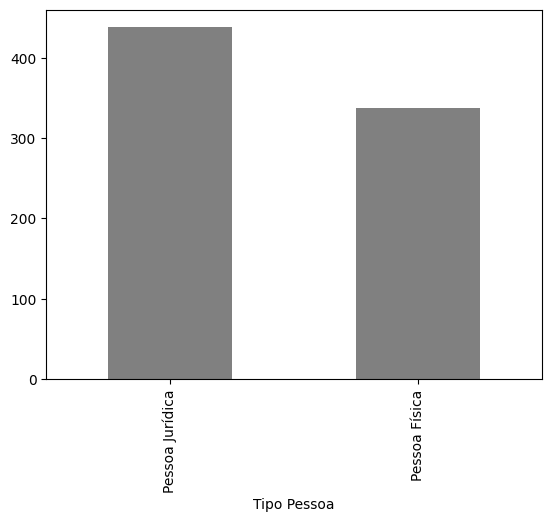

In [58]:
# Bar Chart for Person Type
df_cliente['Tipo Pessoa'].value_counts().plot.bar(color='gray')

***Município (Municipality)***

In [59]:
# Description of the 'Municipality' column
df_cliente['Municipio'].describe()

count           775
unique            4
top       SAO PAULO
freq            366
Name: Municipio, dtype: object

In [60]:
# Counting values ​​in Municipality
df_cliente['Municipio'].value_counts()

Municipio
SAO PAULO         366
RIO DE JANEIRO    197
VITÓRIA           144
BELO HORIZONTE     68
Name: count, dtype: int64

In [61]:
# Counting values ​​in Municipality (normalized)
df_cliente['Municipio'].value_counts(normalize=True)

Municipio
SAO PAULO         0.472258
RIO DE JANEIRO    0.254194
VITÓRIA           0.185806
BELO HORIZONTE    0.087742
Name: proportion, dtype: float64

<Axes: xlabel='Municipio'>

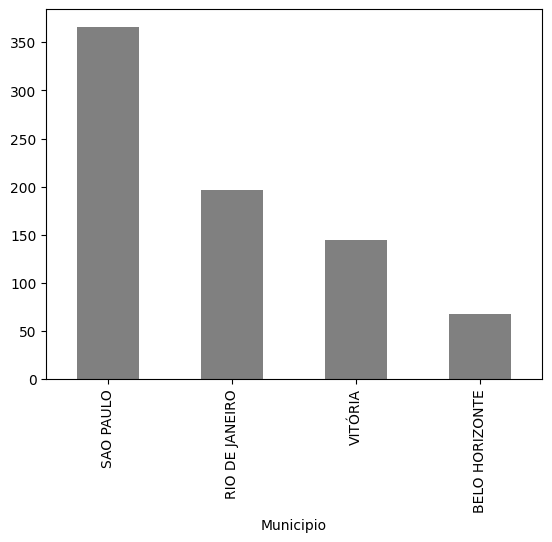

In [62]:
# Bar chart for Municipality
df_cliente['Municipio'].value_counts().plot.bar(color='gray')

***UF***

In [63]:
# UF column description
df_cliente['UF'].describe()

count           775
unique            4
top       SÃO PAULO
freq            366
Name: UF, dtype: object

In [64]:
# Counting values ​​in UF
df_cliente['UF'].value_counts()

UF
SÃO PAULO         366
RIO DE JANEIRO    197
ESPÍRITO SANTO    144
MINAS GERAIS       68
Name: count, dtype: int64

In [65]:
# Counting values ​​in UF (normalized)
df_cliente['UF'].value_counts(normalize=True)

UF
SÃO PAULO         0.472258
RIO DE JANEIRO    0.254194
ESPÍRITO SANTO    0.185806
MINAS GERAIS      0.087742
Name: proportion, dtype: float64

<Axes: xlabel='UF'>

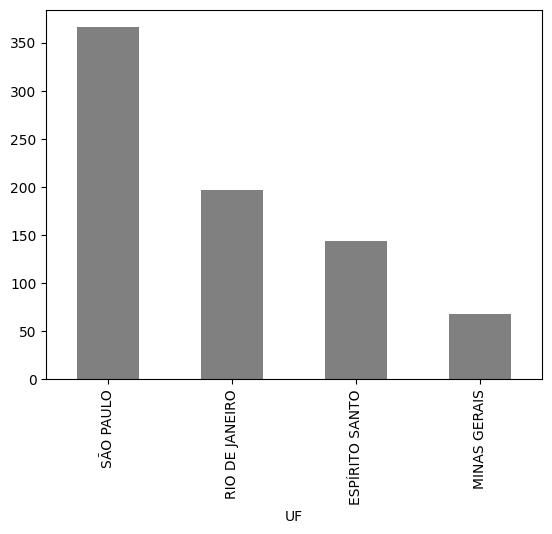

In [66]:
# Bar chart for UF
df_cliente['UF'].value_counts().plot.bar(color='gray')

### 2.2 Fornecedor (Supplier)


In [67]:
# Viewing the Supplier table
df_fornecedor

,Id Fornecedor,Razao Social,Nome Fantasia,Tipo Pessoa,Municipio,UF
0,1,AGROBOI,AGRO BOI IMPORTACAO E EXPORTACAO...,Pessoa Jurídica,RIO DE JANEIRO,RIO DE JANEIRO
1,2,AGROENERGIA,AGROENERGIA COMERCIALIZADORA...,Pessoa Jurídica,RIO DE JANEIRO,RIO DE JANEIRO
2,3,AGROGEN DESENVOLVIMENTO,AGROGEN DESENVOLVIMENTO GENETICO...,Pessoa Física,BELO HORIZONTE,MINAS GERAIS
3,4,AGROINDUSTRIAL,AGROINDUSTRIAL SAO FRANCISCO...,Pessoa Física,RIO DE JANEIRO,RIO DE JANEIRO
4,5,AGROLEITE,AGROLEITE CABINAS AGRICOLAS...,Pessoa Física,SÃO PAULO,SÃO PAULO
...,...,...,...,...,...,...
625,626,AGRO LATINA,AGRO LATINA LTDA,Pessoa Jurídica,VITÓRIA,ESPÍRITO SANTO
626,627,AGRO PRATINHA,AGROPRATINHA S/A,Pessoa Jurídica,VITÓRIA,ESPÍRITO SANTO
627,628,AGRO-PERTENCES,INDUSTRIA AGRO-PERTENCES EIRELI,Pessoa Jurídica,VITÓRIA,ESPÍRITO SANTO
628,629,AGROARACA,AGROARACA INDUSTRIA DE ALIMENTOS...,Pessoa Jurídica,SÃO PAULO,SÃO PAULO


In [68]:
# Checking for null values
df_fornecedor.isnull().sum()

Id Fornecedor    0
Razao Social     0
Nome Fantasia    0
Tipo Pessoa      0
Municipio        0
UF               0
dtype: int64

***Razao Social (Company name)***

In [69]:
# Description of the 'company name' column
df_fornecedor['Razao Social'].describe()

count               630
unique              630
top       AGROAVES LTDA
freq                  1
Name: Razao Social, dtype: object

***Nome Fantasia (Trade name)***

In [70]:
# Description of the Trade Name column
df_fornecedor['Nome Fantasia'].describe()

count                               630
unique                              598
top       LIDER COMERCIO E INDUSTRIA...
freq                                  9
Name: Nome Fantasia, dtype: object

In [71]:
# Checking for duplicates
df_fornecedor['Nome Fantasia'].duplicated().sum()

np.int64(32)

In [72]:
# Filter duplicate rows in the 'Trade Name' column
duplicates = df_fornecedor[df_fornecedor.duplicated(subset=['Nome Fantasia'], keep=False)]
# Display duplicate values
print(duplicates['Nome Fantasia'].value_counts())

Nome Fantasia
LIDER COMERCIO E INDUSTRIA...            9
NOTARO ALIMENTOS LTDA                    6
UNILEVER BRASIL INDUSTRIAL...            5
VIDEOLAR-INNOVA S/A                      3
BEMIS DO BRASIL INDUSTRIA...             2
HOSPITAL E MATERNIDADE SANTA...          2
A. R. C. LOGISTICA E ALIMENTOS...        2
DESTRO BRASIL DISTRIBUICAO...            2
USINA DE ENERGIA EOLICA CARCARA...       2
REPINHO REFLORESTADORA MADEIRAS...       2
CENTRAL GERADORA HIDRELETRICA...         2
CONDOMINIO OPERACIONAL VIASHOPPING...    2
VESUVIUS REFRATARIOS LTDA                2
UNILEVER BRASIL LTDA.                    2
UNIMED DE BAURU COOPERATIVA...           2
INBRASP - INDUSTRIA BRASILEIRA...        2
BELLO ALIMENTOS LTDA                     2
Name: count, dtype: int64


In [73]:
# Remove duplicates
df_fornecedor.drop_duplicates(subset=['Nome Fantasia'], keep='first', inplace=True)
# Check if duplicates have been removed
print('Qtd de valores duplicados:', df_fornecedor['Nome Fantasia'].duplicated().sum())

Qtd de valores duplicados: 0


***Tipo Pessoa (Person Type)***

In [74]:
# Description of the 'Person Type' column
df_fornecedor['Tipo Pessoa'].describe()

count               598
unique                2
top       Pessoa Física
freq                521
Name: Tipo Pessoa, dtype: object

In [75]:
# Counting values ​​in Person Type
df_fornecedor['Tipo Pessoa'].value_counts()

Tipo Pessoa
Pessoa Física      521
Pessoa Jurídica     77
Name: count, dtype: int64

In [76]:
# Counting values ​​in Person Type (normalized)
df_fornecedor['Tipo Pessoa'].value_counts(normalize=True)

Tipo Pessoa
Pessoa Física      0.871237
Pessoa Jurídica    0.128763
Name: proportion, dtype: float64

<Axes: xlabel='Tipo Pessoa'>

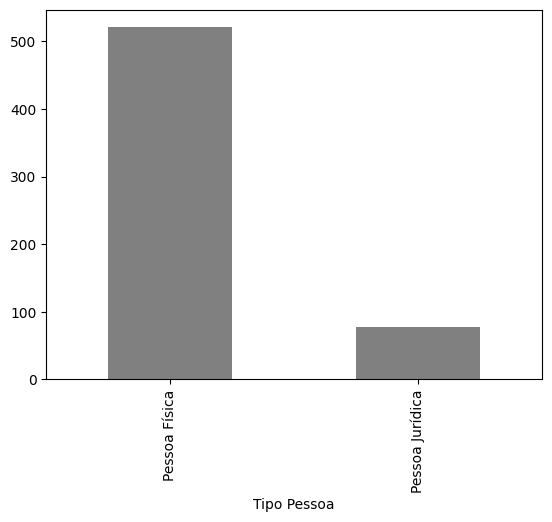

In [77]:
# Bar Chart for Person Type
df_fornecedor['Tipo Pessoa'].value_counts().plot.bar(color='gray')

***Municipio (Municipality)***

In [78]:
# Description of the 'Municipality' column
df_fornecedor['Municipio'].describe()

count           598
unique            4
top       SÃO PAULO
freq            371
Name: Municipio, dtype: object

In [79]:
# Counting values ​​in Municipality
df_fornecedor['Municipio'].value_counts()

Municipio
SÃO PAULO         371
RIO DE JANEIRO    122
BELO HORIZONTE     53
VITÓRIA            52
Name: count, dtype: int64

In [80]:
# Counting values ​​in Municipality (normalized)
df_fornecedor['Municipio'].value_counts(normalize=True)

Municipio
SÃO PAULO         0.620401
RIO DE JANEIRO    0.204013
BELO HORIZONTE    0.088629
VITÓRIA           0.086957
Name: proportion, dtype: float64

<Axes: xlabel='Municipio'>

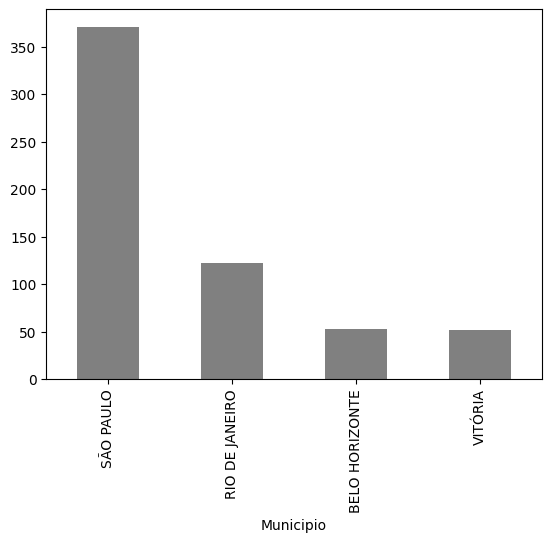

In [81]:
# Bar chart for Municipality
df_fornecedor['Municipio'].value_counts().plot.bar(color='gray')

***UF***

In [82]:
# UF column description
df_fornecedor['UF'].describe()

count           598
unique            4
top       SÃO PAULO
freq            371
Name: UF, dtype: object

In [83]:
# Counting values ​​in UF
df_fornecedor['UF'].value_counts()

UF
SÃO PAULO         371
RIO DE JANEIRO    122
MINAS GERAIS       53
ESPÍRITO SANTO     52
Name: count, dtype: int64

In [84]:
# Counting values ​​in UF (normalized)
df_fornecedor['UF'].value_counts(normalize=True)

UF
SÃO PAULO         0.620401
RIO DE JANEIRO    0.204013
MINAS GERAIS      0.088629
ESPÍRITO SANTO    0.086957
Name: proportion, dtype: float64

<Axes: xlabel='UF'>

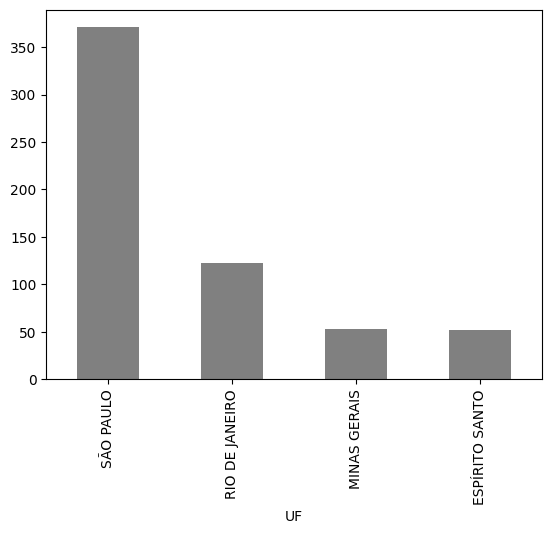

In [85]:
# Bar chart for UF
df_fornecedor['UF'].value_counts().plot.bar(color='gray')

### 2.3 Banco (Bank)

In [86]:
# Viewing the Bank table
df_banco

,Id Banco,Id Conta Bancária,Nome Banco,Município,UF
0,1,x 14057272557-06,BANCO DO BRASIL - SAO PAULO,SAO PAULO,SÃO PAULO
1,2,x 22208151256-06,ITAÚ - SAO PAULO,SAO PAULO,SÃO PAULO
2,3,x 41541621975-04,BRADESCO - SAO PAULO,SAO PAULO,SÃO PAULO
3,4,x 64252401479-03,SANTANDER - SAO PAULO,SAO PAULO,SÃO PAULO
4,5,x 77167377617-02,HSBC - SAO PAULO,SAO PAULO,SÃO PAULO
5,6,x 10859524552-06,BANCO SAFRA - SAO PAULO,SAO PAULO,SÃO PAULO
6,7,x 26759470396-10,BANCO DO BRASIL - RIO DE JANEIRO,RIO DE JANEIRO,RIO DE JANEIRO
7,8,x 25497925389-08,ITAÚ - RIO DE JANEIRO,RIO DE JANEIRO,RIO DE JANEIRO
8,9,x 61320183682-00,BRADESCO - RIO DE JANEIRO,RIO DE JANEIRO,RIO DE JANEIRO
9,10,x 63718177635-06,SANTANDER - RIO DE JANEIRO,RIO DE JANEIRO,RIO DE JANEIRO


In [87]:
# Checking for null values
df_banco.isnull().sum()

Id Banco             0
Id Conta Bancária    0
Nome Banco           0
Município            0
UF                   0
dtype: int64

***Nome Banco (Bank name)***

In [88]:
# Removing the description of the bank name
df_banco['Nome Banco'] = df_banco['Nome Banco'].str.split(' - ').str[0]
# Checking the result
df_banco['Nome Banco'].describe()

count                  24
unique                  6
top       BANCO DO BRASIL
freq                    4
Name: Nome Banco, dtype: object

In [89]:
# Counting values ​​in the Bank Name column
df_banco['Nome Banco'].value_counts()

Nome Banco
BANCO DO BRASIL    4
ITAÚ               4
BRADESCO           4
SANTANDER          4
HSBC               4
BANCO SAFRA        4
Name: count, dtype: int64

In [90]:
# Counting values ​​in the Bank Name column (normalized)
df_banco['Nome Banco'].value_counts(normalize=True)

Nome Banco
BANCO DO BRASIL    0.166667
ITAÚ               0.166667
BRADESCO           0.166667
SANTANDER          0.166667
HSBC               0.166667
BANCO SAFRA        0.166667
Name: proportion, dtype: float64

***Município (Municipality)***

In [91]:
# Bank description 
df_banco['Município'].describe()

count            24
unique            4
top       SAO PAULO
freq              6
Name: Município, dtype: object

In [92]:
# Counting values ​​in Municipality
df_banco['Município'].value_counts()

Município
SAO PAULO         6
RIO DE JANEIRO    6
VITÓRIA           6
BELO HORIZONTE    6
Name: count, dtype: int64

In [93]:
# Counting values ​​in Municipality (normalized)
df_banco['Município'].value_counts(normalize=True)

Município
SAO PAULO         0.25
RIO DE JANEIRO    0.25
VITÓRIA           0.25
BELO HORIZONTE    0.25
Name: proportion, dtype: float64

***UF***

In [94]:
# UF
df_banco['UF'].describe()

count            24
unique            4
top       SÃO PAULO
freq              6
Name: UF, dtype: object

In [95]:
# Counting values ​​in UF
df_banco['UF'].value_counts()

UF
SÃO PAULO         6
RIO DE JANEIRO    6
ESPÍRITO SANTO    6
MINAS GERAIS      6
Name: count, dtype: int64

In [96]:
# Counting values ​​in UF (normalized)
df_banco['UF'].value_counts(normalize=True)

UF
SÃO PAULO         0.25
RIO DE JANEIRO    0.25
ESPÍRITO SANTO    0.25
MINAS GERAIS      0.25
Name: proportion, dtype: float64

## Updating the database

In [97]:
# Definir o caminho do arquivo de backup
backup_path = '.\\BaseFinanceiro\\Financeiro_backup.xlsx'

# Criar uma cópia de segurança do arquivo original
shutil.copy(file_path, backup_path)
print(f"Cópia de segurança criada em: {backup_path}")

Cópia de segurança criada em: .\BaseFinanceiro\Financeiro_backup.xlsx


In [ ]:
# Update the original file with the modified data
with pd.ExcelWriter(file_path) as writer:
    for sheet_name, df in dataset.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)
print("File updated successfully!")

# Option to restore the original file (uncomment to execute)

# shutil.copy(backup_path, file_path)
# print("Original file restored successfully!")

# # Verify the restored file
# df_restaurado = pd.read_excel(file_path)
# print(df_restaurado.head())

File updated successfully!
